In [3]:
import numpy as np
import keras, cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1, 
                                   rotation_range=5,fill_mode='constant',shear_range=0.1)
train_generator = train_datagen.flow_from_directory(
        'character_set/train', 
        target_size=(28,28),  
        batch_size=16,
        color_mode = 'grayscale',
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        'character_set/val',  
        target_size=(28,28),
        batch_size=1,
        color_mode = 'grayscale',
        class_mode='categorical')

Found 996 images belonging to 36 classes.
Found 222 images belonging to 36 classes.


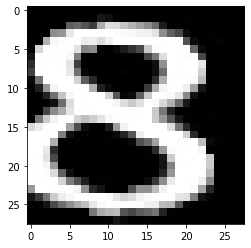

In [5]:
plt.imshow(np.squeeze(train_generator[0][0][2]), cmap='gray')

In [11]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))     # 36 classes: A-Z, 0-9

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                294976    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

In [12]:
# model.load_weights('char_best_weights--0.9820.hdf5')

In [16]:
ckpt = ModelCheckpoint('char_weights--{val_accuracy:.4f}.hdf5', monitor='val_accuracy', verbose=0, save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['accuracy'])

In [17]:
model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples ,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples,
      epochs = 10,
       callbacks = [ckpt])

Epoch 1/10
996/996 [==============================] - 18s 18ms/step - loss: 0.1158 - accuracy: 0.9537 - val_loss: 3.3379e-06 - val_accuracy: 0.9910
Epoch 2/10
996/996 [==============================] - 18s 18ms/step - loss: 0.1006 - accuracy: 0.9602 - val_loss: 1.7881e-06 - val_accuracy: 0.9820
Epoch 3/10
996/996 [==============================] - 17s 18ms/step - loss: 0.0985 - accuracy: 0.9629 - val_loss: 1.4305e-06 - val_accuracy: 1.0000
Epoch 4/10
996/996 [==============================] - 17s 17ms/step - loss: 0.0937 - accuracy: 0.9626 - val_loss: 1.1921e-07 - val_accuracy: 0.9910
Epoch 5/10
996/996 [==============================] - 18s 18ms/step - loss: 0.0861 - accuracy: 0.9643 - val_loss: 0.0000e+00 - val_accuracy: 0.9910
Epoch 6/10
996/996 [==============================] - 17s 17ms/step - loss: 0.0862 - accuracy: 0.9646 - val_loss: 0.0000e+00 - val_accuracy: 0.9910
Epoch 7/10
996/996 [==============================] - 18s 18ms/step - loss: 0.0864 - accuracy: 0.9657 - val_loss

In [18]:
model.evaluate_generator(validation_generator)

[0.0, 0.9864864945411682]

In [19]:
img = cv2.imread('test.png', 0)
img = img.reshape(1,28,28,1)
img = img/255.0

In [20]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'class_0',
 1: 'class_1',
 2: 'class_2',
 3: 'class_3',
 4: 'class_4',
 5: 'class_5',
 6: 'class_6',
 7: 'class_7',
 8: 'class_8',
 9: 'class_9',
 10: 'class_A',
 11: 'class_B',
 12: 'class_C',
 13: 'class_D',
 14: 'class_E',
 15: 'class_F',
 16: 'class_G',
 17: 'class_H',
 18: 'class_I',
 19: 'class_J',
 20: 'class_K',
 21: 'class_L',
 22: 'class_M',
 23: 'class_N',
 24: 'class_O',
 25: 'class_P',
 26: 'class_Q',
 27: 'class_R',
 28: 'class_S',
 29: 'class_T',
 30: 'class_U',
 31: 'class_V',
 32: 'class_W',
 33: 'class_X',
 34: 'class_Y',
 35: 'class_Z'}

In [21]:
idx = model.predict_classes(img)

In [22]:
labels[idx[0]].split('_')[1]

'I'